In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics

### Features para Umidade relativa

In [2]:
target_wanderlay = ['UMIDADE RELATIVA DO MINIMA AR (%)']
features_UR_wanderlay = ['Altitude(metros)',
                         'Latitude',
                         'Longitude',
                         'TEMPERATURA MAXIMA (C)',
                        'TEMPERATURA MINIMA (C)']
features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

### Criando o dataframe que ira guardar os valores d

In [3]:
data_ur_erros = pd.DataFrame(columns=['Month','Qto_estacioes','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE'])

### Pegando as base de dados do primeiro mês


In [4]:
data_mean_jan = pd.read_csv('../Dados/Brasil_1_mean.csv')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jan[features_UR_wanderlay], 
                                                    data_mean_jan[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)


mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9236679342277583
MAE: 1.6278940958618282
MSE: 4.43071945081826
MSLE: 0.0008204726663358858
MedLE: 1.181882735958908
R2 Score: 0.9236440841829211
Error(UR_true - UR_pred)
MIN: 0.028462311045501565 	MAX: 5.691934773229178 	MEAN: 1.6278940958618282	Std: 1.3344213215759333


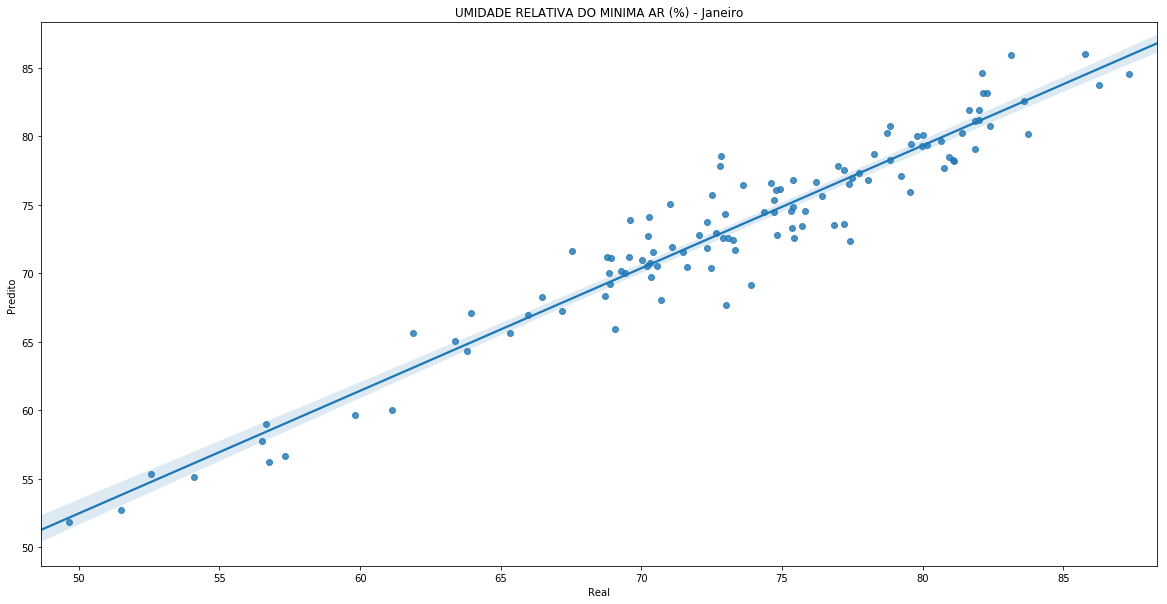

In [9]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Janeiro')
plt.savefig('../Validacao/graph/UR_min_jan.png')

In [10]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[1]=['Janeiro',len(data_mean_jan),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.00082,1.181883


In [11]:
pickle.dump(mlp,open('../Models/URmin/urmin_1.model','wb'))

## Fevereiro

In [12]:
data_mean_fev = pd.read_csv('../Dados/Brasil_2_mean.csv')
data_mean_fev.head(5)

,Nome,Altitude(metros),Codigo OMM,Day,H(UTC),Latitude,Longitude,Month,PRECIPITACAO (mm),PRESSAO ATMOSFERICA (hPa),...,TEMPERATURA DO AR (C),TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA (C),TEMPERATURA MINIMA (C),TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C),TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C),UMIDADE RELATIVA DO AR (%),UMIDADE RELATIVA DO MAXIMA AR (%),UMIDADE RELATIVA DO MINIMA AR (%),Year
0,Abrolhos-A422,21.0,86765.0,14.342558,11.526834,-17.963016,-38.703288,2.0,0.062558,1011.875577,...,27.061635,22.703732,27.438134,26.707338,23.128386,22.295178,77.356604,79.134382,75.533124,2012.864990
1,Acaraú-A360,67.0,81755.0,14.646465,11.500000,-3.121067,-40.087288,2.0,0.167845,1003.145665,...,26.763510,22.455934,27.345918,26.229398,22.874327,22.052125,79.125421,81.441709,76.664352,2013.010101
2,Afonso Cláudio-A657,507.0,86827.0,14.754386,11.500000,-20.104194,-41.106861,2.0,0.136330,956.387573,...,25.172844,18.401060,26.209064,24.245431,19.216484,17.651133,68.985015,72.372076,65.493421,2014.245614
3,Aimorés-A534,288.0,86803.0,14.638834,11.519928,-19.532768,-41.090801,2.0,0.087022,985.983070,...,26.704447,19.654924,27.470438,25.996772,20.279677,19.046690,68.021245,71.030468,64.930830,2012.005105
4,Alegre-A617,129.0,86828.0,14.653897,11.504052,-20.750412,-41.488852,2.0,0.146368,997.771239,...,27.041579,19.732518,27.838544,26.311581,20.373567,19.147075,68.221600,71.498895,64.898188,2011.506999


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_fev[features_UR_wanderlay], 
                                                    data_mean_fev[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9108002303846429
MAE: 1.6887710624028955
MSE: 5.0272098608563045
MSLE: 0.0009467921393957483
MedLE: 1.3771779254998506
R2 Score: 0.9074033759333986
Error(UR_true - UR_pred)
MIN: 0.031994608624643206 	MAX: 7.299493228049911 	MEAN: 1.6887710624028955	Std: 1.4748769981415057


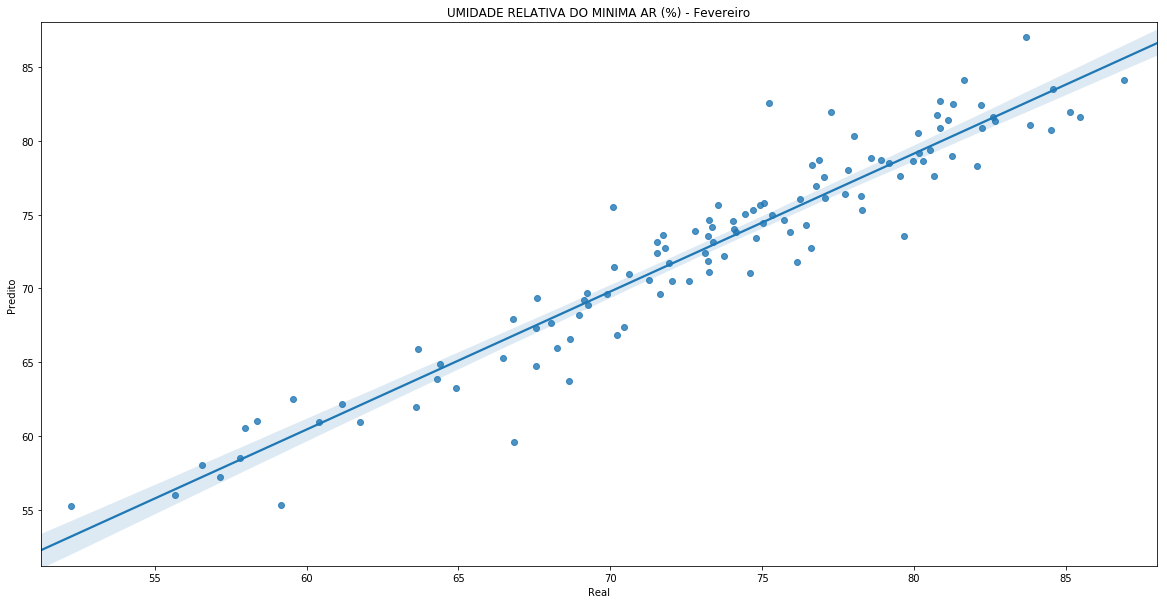

In [18]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Fevereiro')
plt.savefig('../Validacao/graph/UR_min_fev.png')

In [19]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[2]=['Fevereiro',len(data_mean_fev),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178


In [20]:
pickle.dump(mlp,open('../Models/URmin/urmin_2.model','wb'))

## Março

In [21]:
data_mean_mar = pd.read_csv('../Dados/Brasil_3_mean.csv')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mar[features_UR_wanderlay], 
                                                    data_mean_mar[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9112591727797557
MAE: 1.5160028954079898
MSE: 4.990510246073566
MSLE: 0.00104454805429035
MedLE: 0.9196750717022582
R2 Score: 0.9099593049958241

Error(UR_true - UR_pred)

MIN: 0.0014958154857822592 
MAX: 11.387345666522123 
MEAN: 1.5160028954079898
Std: 1.6408063466442828


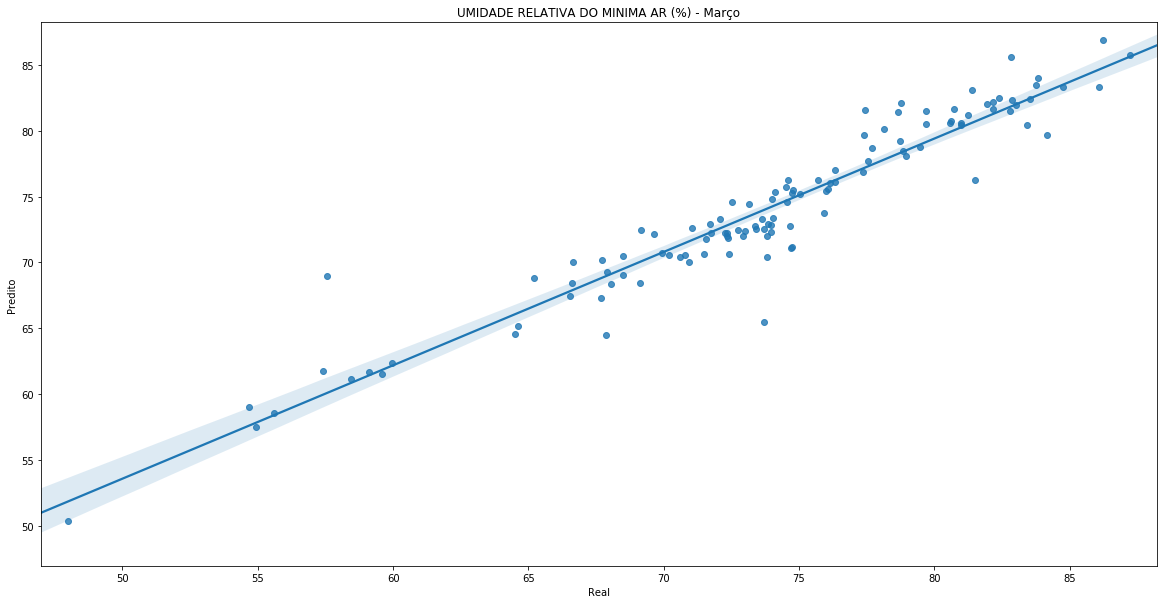

In [26]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Março')
plt.savefig('../Validacao/graph/UR_min_mar.png')

In [27]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[3]=['Março',len(data_mean_mar),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178
3,Março,458,1.516003,0.001496,11.387346,1.640806,0.911259,0.909959,1.516003,4.990510,0.001045,0.919675


In [28]:
pickle.dump(mlp,open('../Models/URmin/urmin_3.model','wb'))

## Abril

In [29]:
data_mean_abr = pd.read_csv('../Dados/Brasil_4_mean.csv')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_abr[features_UR_wanderlay], 
                                                    data_mean_abr[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.8827800525652639
MAE: 1.6027537743237088
MSE: 4.77446584810153
MSLE: 0.0008667722436470624
MedLE: 1.2921237210431826
R2 Score: 0.8827269434920201

Error(UR_true - UR_pred)

MIN: 0.024951334336748232 
MAX: 9.454841034296066 
MEAN: 1.6027537743237088
Std: 1.4851418070314482


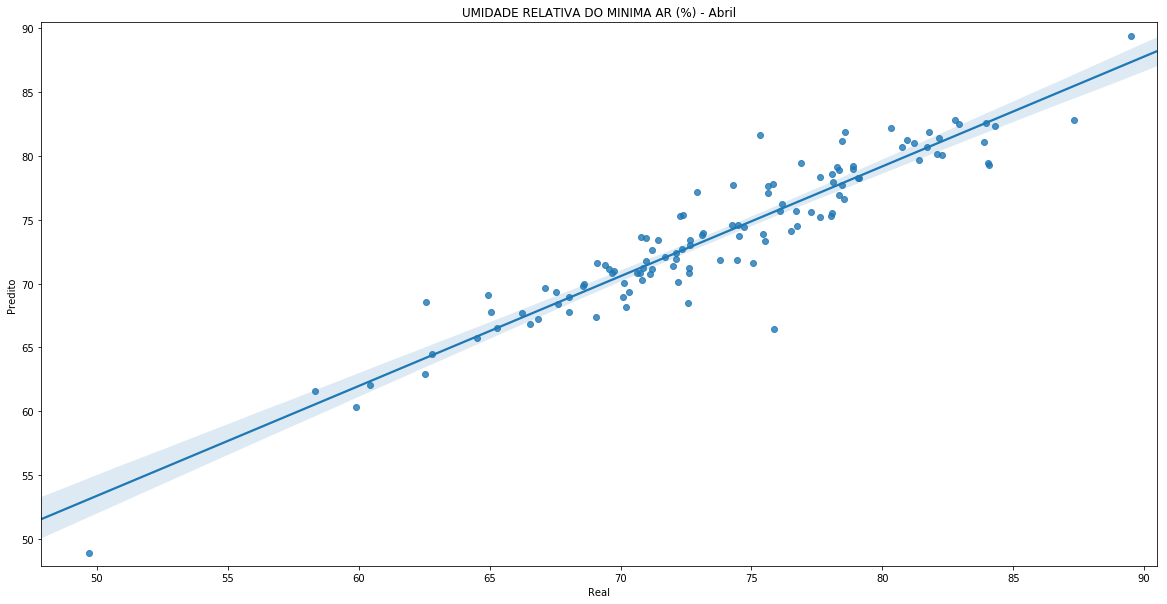

In [39]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Abril')
plt.savefig('../Validacao/graph/UR_min_abr.png')

In [40]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[4]=['Abril',len(data_mean_abr),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178
3,Março,458,1.516003,0.001496,11.387346,1.640806,0.911259,0.909959,1.516003,4.990510,0.001045,0.919675
4,Abril,461,1.602754,0.024951,9.454841,1.485142,0.882780,0.882727,1.602754,4.774466,0.000867,1.292124


In [41]:
pickle.dump(mlp,open('../Models/URmin/urmin_4.model','wb'))

## Maio

In [42]:
data_mean_mai = pd.read_csv('../Dados/Brasil_5_mean.csv')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mai[features_UR_wanderlay], 
                                                    data_mean_mai[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9318279343542863
MAE: 1.5403344252403348
MSE: 3.8179816975901173
MSLE: 0.0007678708832439658
MedLE: 1.1212828316496584
R2 Score: 0.9316012839248256

Error(UR_true - UR_pred)

MIN: 0.013485685709497375 
MAX: 5.540139443244541 
MEAN: 1.5403344252403348
Std: 1.202227747146789


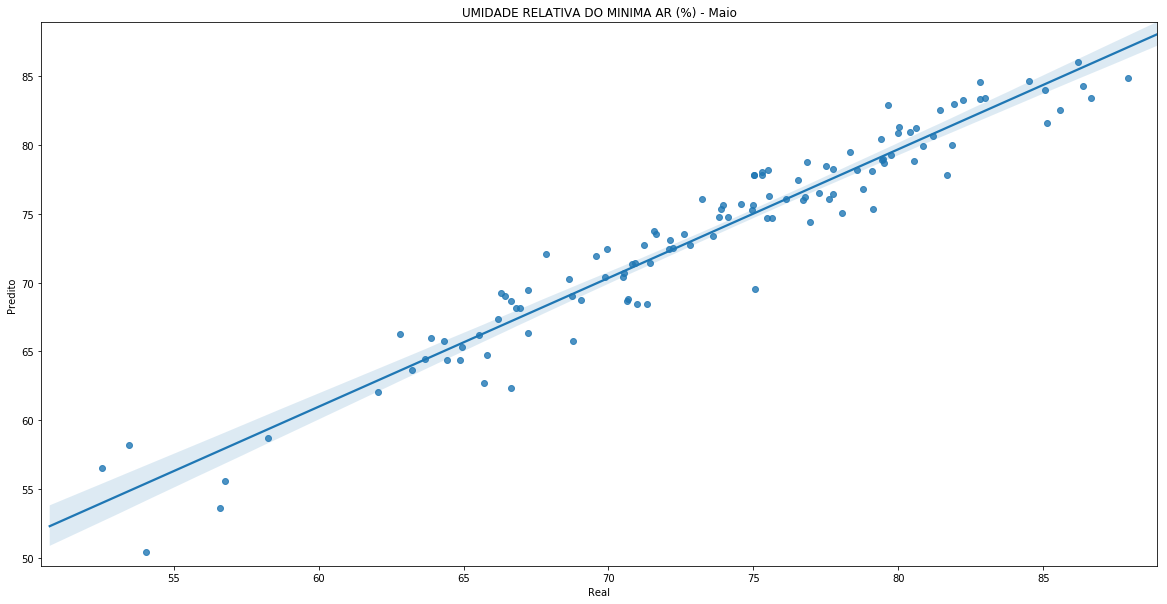

In [47]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min()),max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Maio')
plt.savefig('../Validacao/graph/UR_min_mai.png')

In [48]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[5]=['Maio',len(data_mean_mai),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178
3,Março,458,1.516003,0.001496,11.387346,1.640806,0.911259,0.909959,1.516003,4.990510,0.001045,0.919675
4,Abril,461,1.602754,0.024951,9.454841,1.485142,0.882780,0.882727,1.602754,4.774466,0.000867,1.292124
5,Maio,461,1.540334,0.013486,5.540139,1.202228,0.931828,0.931601,1.540334,3.817982,0.000768,1.121283


In [49]:
pickle.dump(mlp,open('../Models/URmin/urmin_5.model','wb'))

## Junho

In [50]:
data_mean_jun = pd.read_csv('../Dados/Brasil_6_mean.csv')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jun[features_UR_wanderlay], 
                                                    data_mean_jun[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9238196019269547
MAE: 2.050331718788041
MSE: 6.835702170270331
MSLE: 0.0014786589786911252
MedLE: 1.7107184408854152
R2 Score: 0.923546024307813

Error(UR_true - UR_pred)

MIN: 0.0014846053485655375 
MAX: 7.0577456271153025 
MEAN: 2.050331718788041
Std: 1.6222952916167912


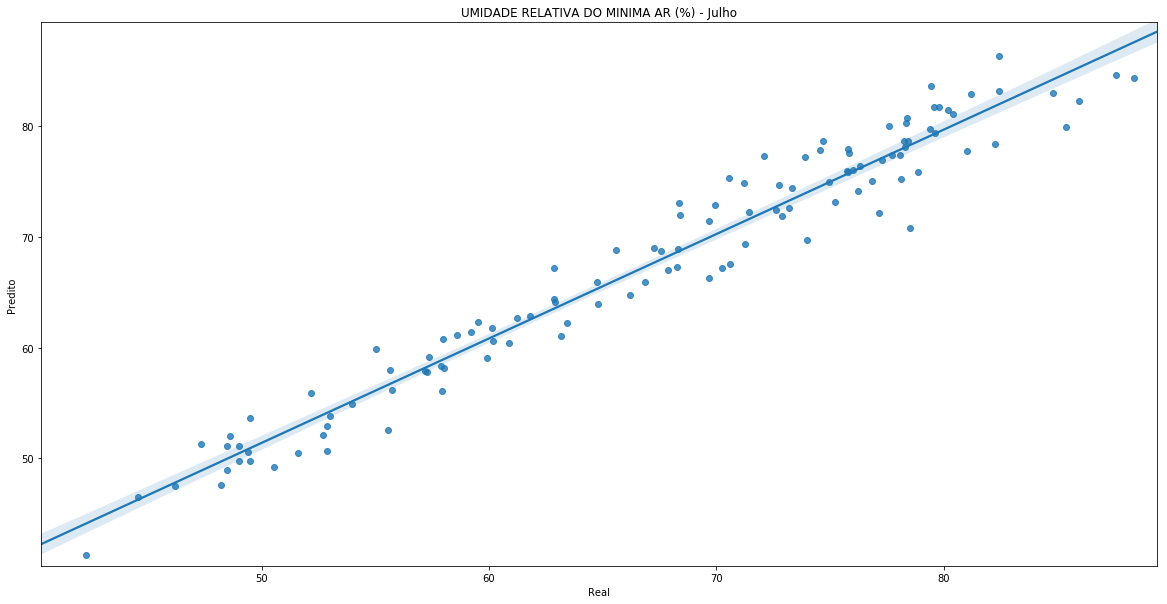

In [66]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Junho')
plt.savefig('../Validacao/graph/UR_min_jun.png')

In [54]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[6]=['Junho',len(data_mean_jun),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178
3,Março,458,1.516003,0.001496,11.387346,1.640806,0.911259,0.909959,1.516003,4.990510,0.001045,0.919675
4,Abril,461,1.602754,0.024951,9.454841,1.485142,0.882780,0.882727,1.602754,4.774466,0.000867,1.292124
5,Maio,461,1.540334,0.013486,5.540139,1.202228,0.931828,0.931601,1.540334,3.817982,0.000768,1.121283
6,Junho,467,2.050332,0.001485,7.057746,1.622295,0.923820,0.923546,2.050332,6.835702,0.001479,1.710718


In [55]:
pickle.dump(mlp,open('../Models/URmin/urmin_6.model','wb'))

## Julho

In [56]:
data_mean_jul = pd.read_csv('../Dados/Brasil_7_mean.csv')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jul[features_UR_wanderlay], 
                                                    data_mean_jul[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9552622080196266
MAE: 1.9480542884361884
MSE: 6.013658629271977
MSLE: 0.0012751924503416618
MedLE: 1.716392011847816
R2 Score: 0.9540363380972415

Error(UR_true - UR_pred)

MIN: 0.024750335365183673 
MAX: 7.699357349902158 
MEAN: 1.9480542884361884
Std: 1.4895446010701896


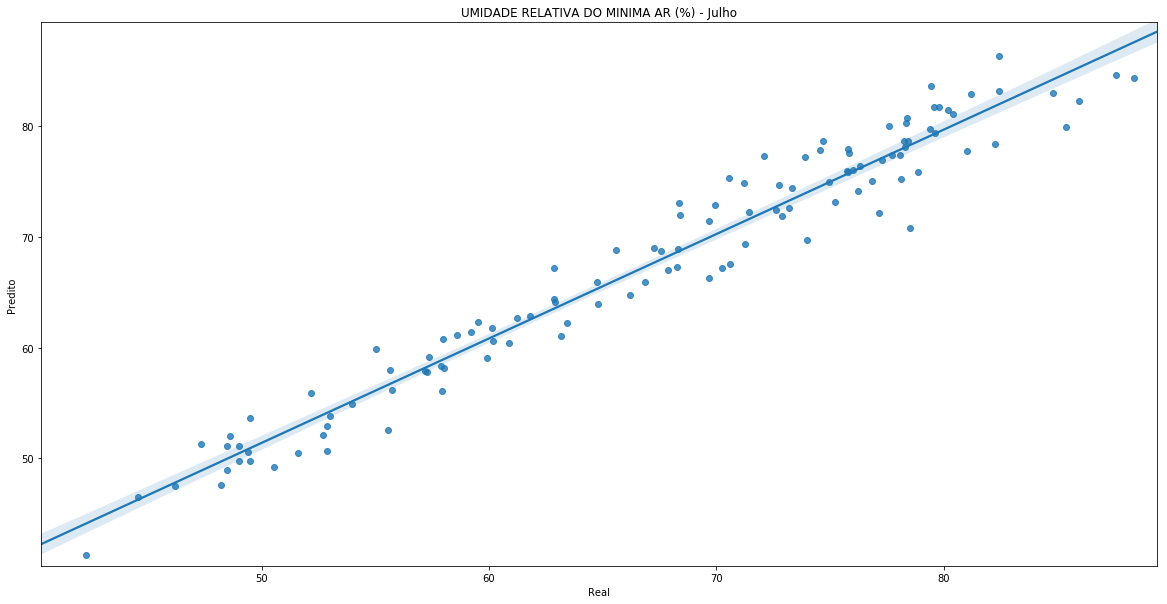

In [66]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Julho')
plt.savefig('../Validacao/graph/UR_min_jul.png')

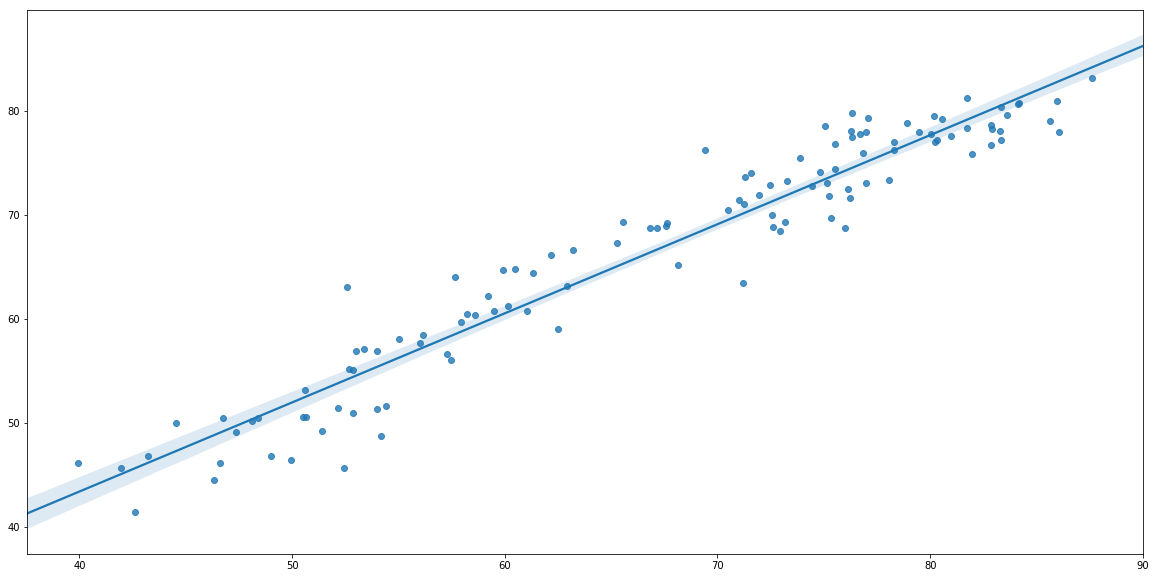

In [99]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [67]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[7]=['Julho',len(data_mean_jul),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178
3,Março,458,1.516003,0.001496,11.387346,1.640806,0.911259,0.909959,1.516003,4.990510,0.001045,0.919675
4,Abril,461,1.602754,0.024951,9.454841,1.485142,0.882780,0.882727,1.602754,4.774466,0.000867,1.292124
5,Maio,461,1.540334,0.013486,5.540139,1.202228,0.931828,0.931601,1.540334,3.817982,0.000768,1.121283
6,Junho,467,2.050332,0.001485,7.057746,1.622295,0.923820,0.923546,2.050332,6.835702,0.001479,1.710718
7,Julho,467,1.948054,0.024750,7.699357,1.489545,0.955262,0.954036,1.948054,6.013659,0.001275,1.716392


In [68]:
pickle.dump(mlp,open('../Models/URmin/urmin_7.model','wb'))

## Agosto

In [69]:
data_mean_ago = pd.read_csv('../Dados/Brasil_8_mean.csv')

In [73]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_ago[features_UR_wanderlay], 
                                                    data_mean_ago[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9618303059951301
MAE: 2.138770001143654
MSE: 7.920609522839476
MSLE: 0.00225538952322468
MedLE: 1.5495725847974313
R2 Score: 0.9617831139783709

Error(UR_true - UR_pred)

MIN: 0.003660377558404093 
MAX: 10.171246942732807 
MEAN: 2.138770001143654
Std: 1.829281937003547


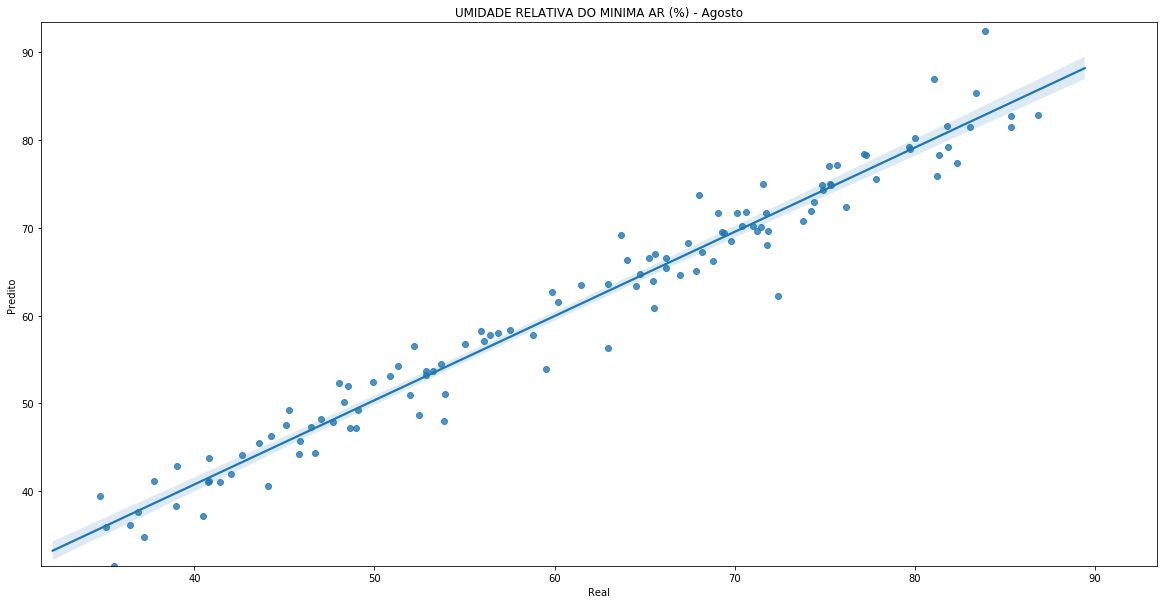

In [77]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min()),max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min()),max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Agosto')
plt.savefig('../Validacao/graph/UR_min_ago.png')

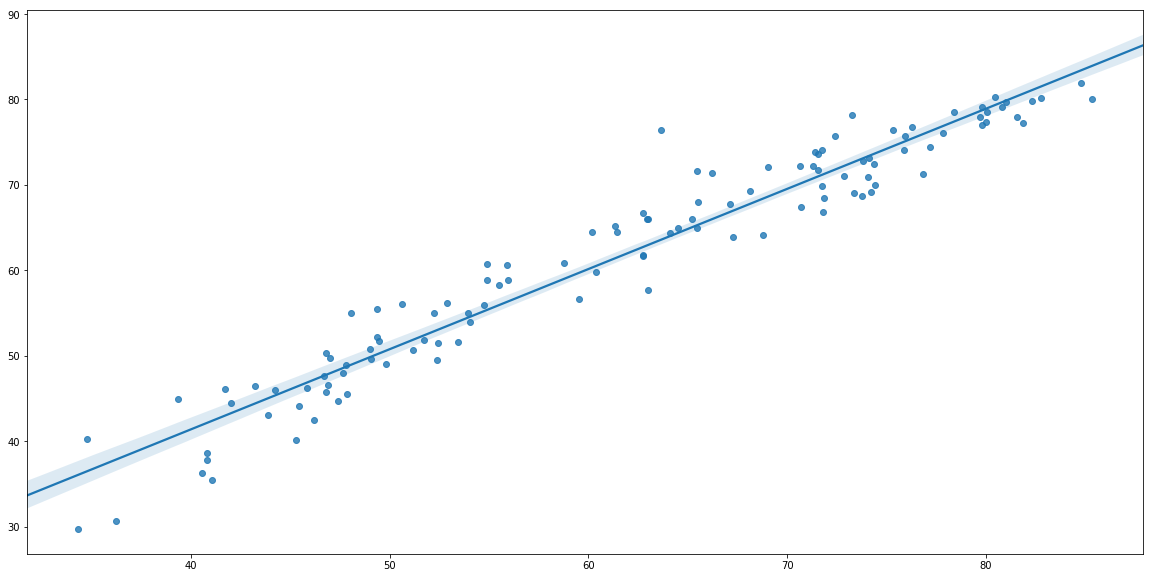

In [108]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [78]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[8]=['Agosto',len(data_mean_ago),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178
3,Março,458,1.516003,0.001496,11.387346,1.640806,0.911259,0.909959,1.516003,4.990510,0.001045,0.919675
4,Abril,461,1.602754,0.024951,9.454841,1.485142,0.882780,0.882727,1.602754,4.774466,0.000867,1.292124
5,Maio,461,1.540334,0.013486,5.540139,1.202228,0.931828,0.931601,1.540334,3.817982,0.000768,1.121283
6,Junho,467,2.050332,0.001485,7.057746,1.622295,0.923820,0.923546,2.050332,6.835702,0.001479,1.710718
7,Julho,467,1.948054,0.024750,7.699357,1.489545,0.955262,0.954036,1.948054,6.013659,0.001275,1.716392
8,Agosto,468,2.138770,0.003660,10.171247,1.829282,0.961830,0.961783,2.138770,7.920610,0.002255,1.549573


In [79]:
pickle.dump(mlp,open('../Models/URmin/urmin_8.model','wb'))

## Setembro

In [80]:
data_mean_set = pd.read_csv('../Dados/Brasil_9_mean.csv')

In [85]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_set[features_UR_wanderlay], 
                                                    data_mean_set[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9625509829826262
MAE: 1.9904276785249937
MSE: 6.956789725909222
MSLE: 0.002157135750865479
MedLE: 1.5118315460624423
R2 Score: 0.9625340851629611

Error(UR_true - UR_pred)

MIN: 0.05561921981009732 
MAX: 8.731754802818756 
MEAN: 1.9904276785249937
Std: 1.7306031845778012


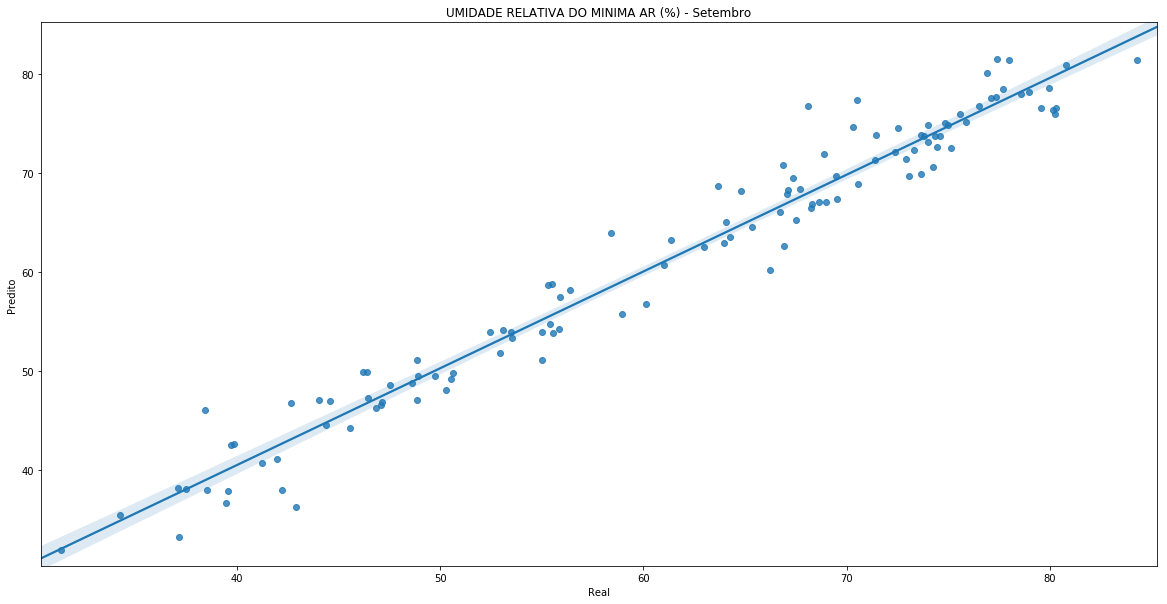

In [86]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Setembro')
plt.savefig('../Validacao/graph/UR_min_set.png')

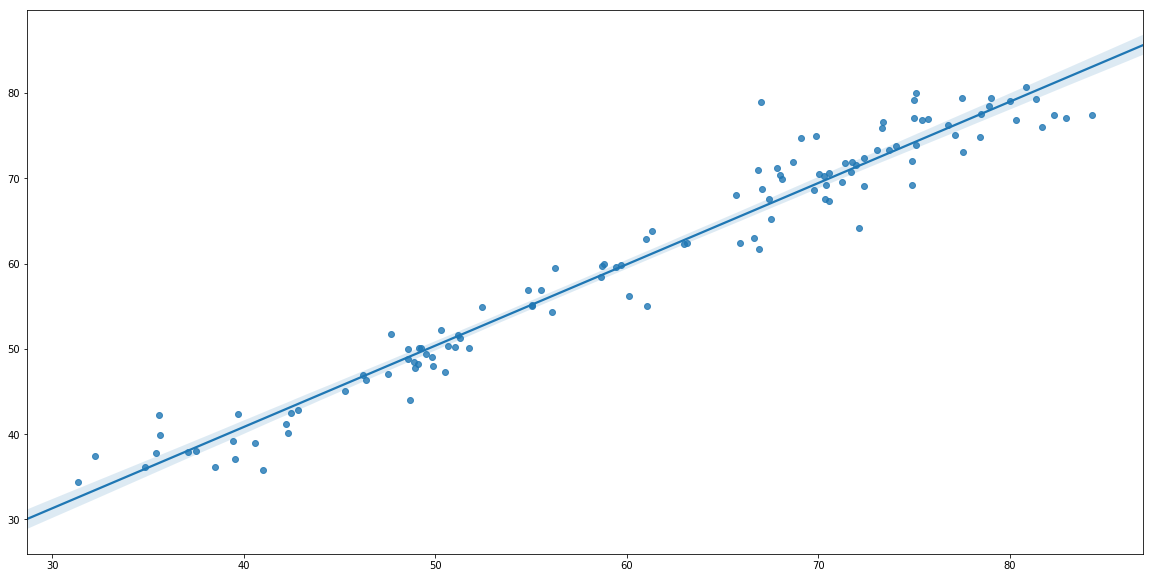

In [121]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [87]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[9]=['Setembro',len(data_mean_set),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178
3,Março,458,1.516003,0.001496,11.387346,1.640806,0.911259,0.909959,1.516003,4.990510,0.001045,0.919675
4,Abril,461,1.602754,0.024951,9.454841,1.485142,0.882780,0.882727,1.602754,4.774466,0.000867,1.292124
5,Maio,461,1.540334,0.013486,5.540139,1.202228,0.931828,0.931601,1.540334,3.817982,0.000768,1.121283
6,Junho,467,2.050332,0.001485,7.057746,1.622295,0.923820,0.923546,2.050332,6.835702,0.001479,1.710718
7,Julho,467,1.948054,0.024750,7.699357,1.489545,0.955262,0.954036,1.948054,6.013659,0.001275,1.716392
8,Agosto,468,2.138770,0.003660,10.171247,1.829282,0.961830,0.961783,2.138770,7.920610,0.002255,1.549573
9,Setembro,470,1.990428,0.055619,8.731755,1.730603,0.962551,0.962534,1.990428,6.956790,0.002157,1.511832


In [88]:
pickle.dump(mlp,open('../Models/URmin/urmin_9.model','wb'))

## Outubro

In [89]:
data_mean_out = pd.read_csv('../Dados/Brasil_10_mean.csv')

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_out[features_UR_wanderlay], 
                                                    data_mean_out[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9703687452259642
MAE: 1.5555671203456736
MSE: 4.02081100527182
MSLE: 0.0011402012268238945
MedLE: 1.1914957879163666
R2 Score: 0.970280400272059

Error(UR_true - UR_pred)

MIN: 0.003191513024574988 
MAX: 7.3538892950298305 
MEAN: 1.5555671203456736
Std: 1.2653149565903687


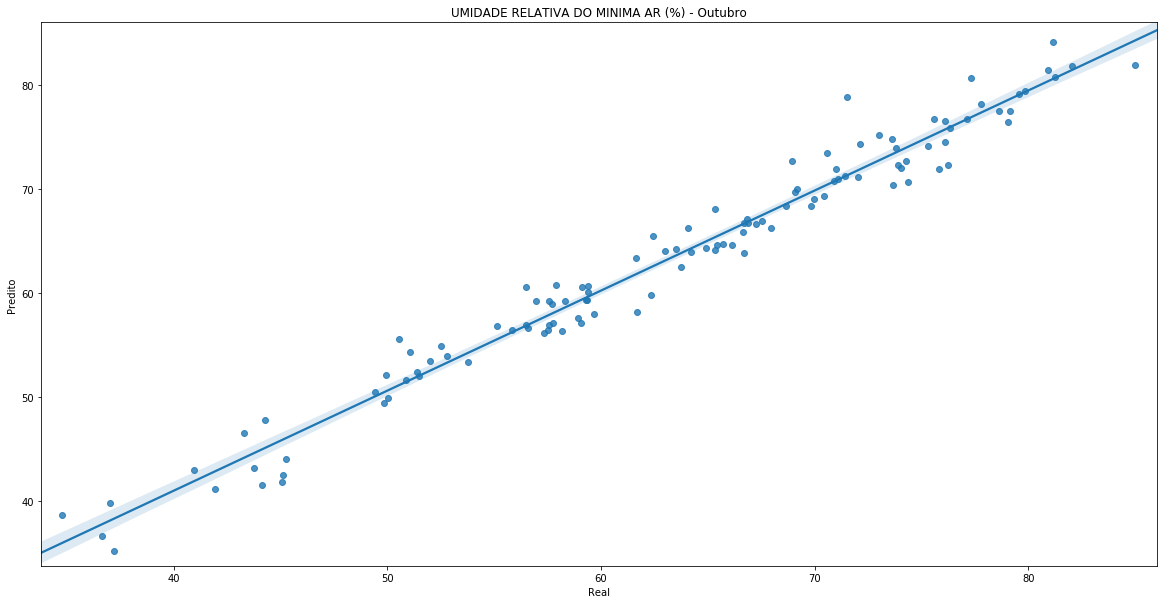

In [93]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Outubro')
plt.savefig('../Validacao/graph/UR_min_out.png')

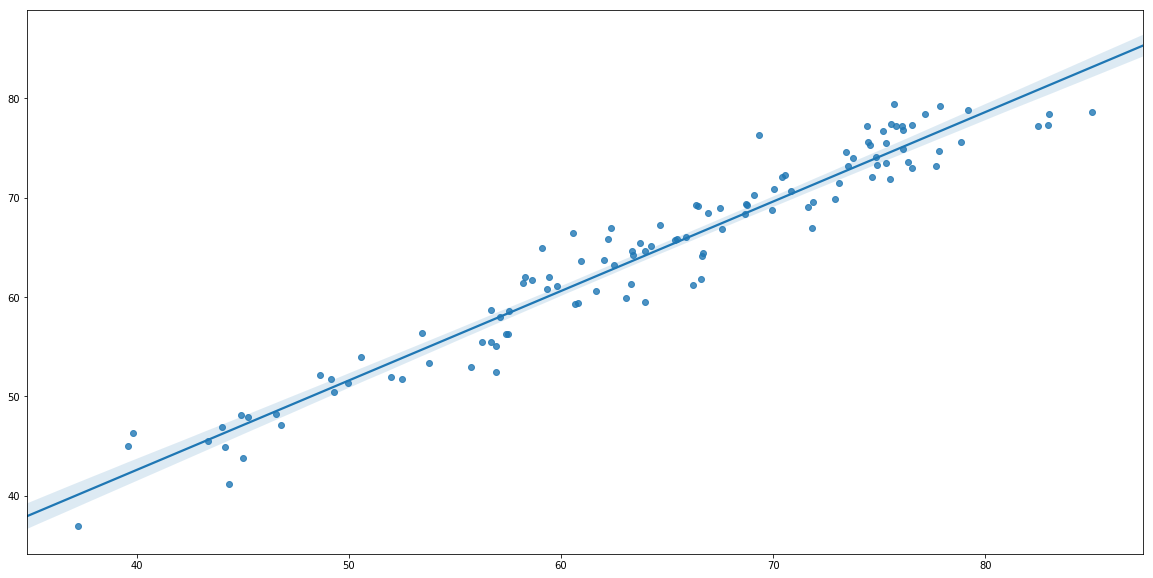

In [130]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [94]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[10]=['Outubro',len(data_mean_out),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178
3,Março,458,1.516003,0.001496,11.387346,1.640806,0.911259,0.909959,1.516003,4.990510,0.001045,0.919675
4,Abril,461,1.602754,0.024951,9.454841,1.485142,0.882780,0.882727,1.602754,4.774466,0.000867,1.292124
5,Maio,461,1.540334,0.013486,5.540139,1.202228,0.931828,0.931601,1.540334,3.817982,0.000768,1.121283
6,Junho,467,2.050332,0.001485,7.057746,1.622295,0.923820,0.923546,2.050332,6.835702,0.001479,1.710718
7,Julho,467,1.948054,0.024750,7.699357,1.489545,0.955262,0.954036,1.948054,6.013659,0.001275,1.716392
8,Agosto,468,2.138770,0.003660,10.171247,1.829282,0.961830,0.961783,2.138770,7.920610,0.002255,1.549573
9,Setembro,470,1.990428,0.055619,8.731755,1.730603,0.962551,0.962534,1.990428,6.956790,0.002157,1.511832
10,Outubro,458,1.555567,0.003192,7.353889,1.265315,0.970369,0.970280,1.555567,4.020811,0.001140,1.191496


In [95]:
pickle.dump(mlp,open('../Models/URmin/urmin_10.model','wb'))

## Novembro

In [96]:
data_mean_nov = pd.read_csv('../Dados/Brasil_11_mean.csv')

In [103]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_nov[features_UR_wanderlay], 
                                                    data_mean_nov[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9300682914634008
MAE: 2.0954735464627126
MSE: 6.774308090719615
MSLE: 0.0014630286637407023
MedLE: 1.7823693419533413
R2 Score: 0.9298234213196623

Error(UR_true - UR_pred)

MIN: 0.006837865319667458 
MAX: 6.507292214783789 
MEAN: 2.0954735464627126
Std: 1.5437936088721824


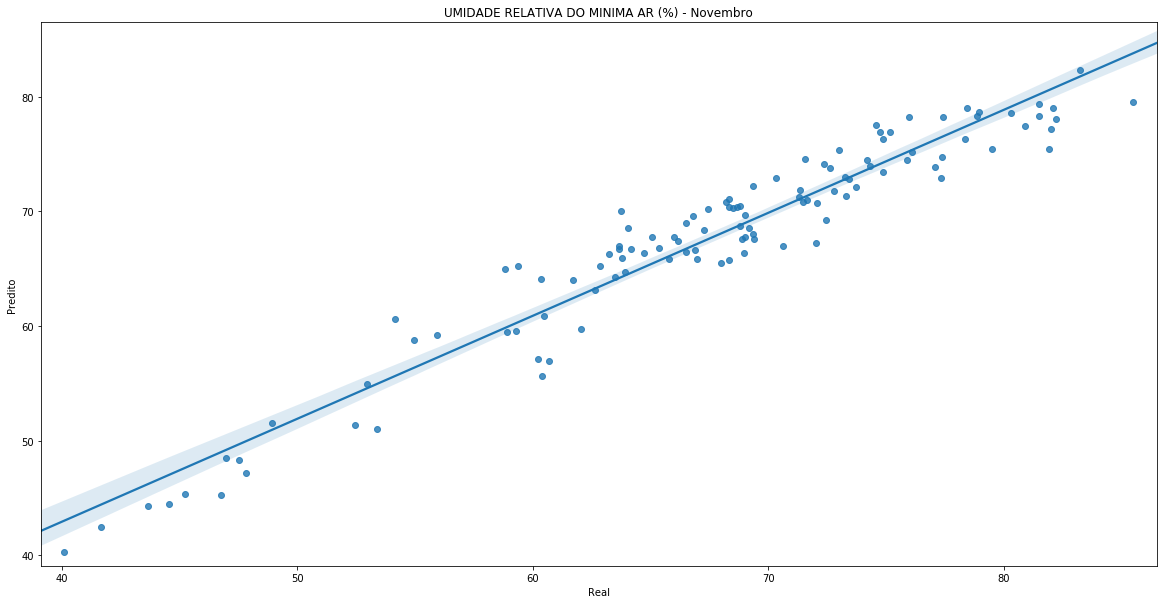

In [104]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Novembro')
plt.savefig('../Validacao/graph/UR_min_nov.png')

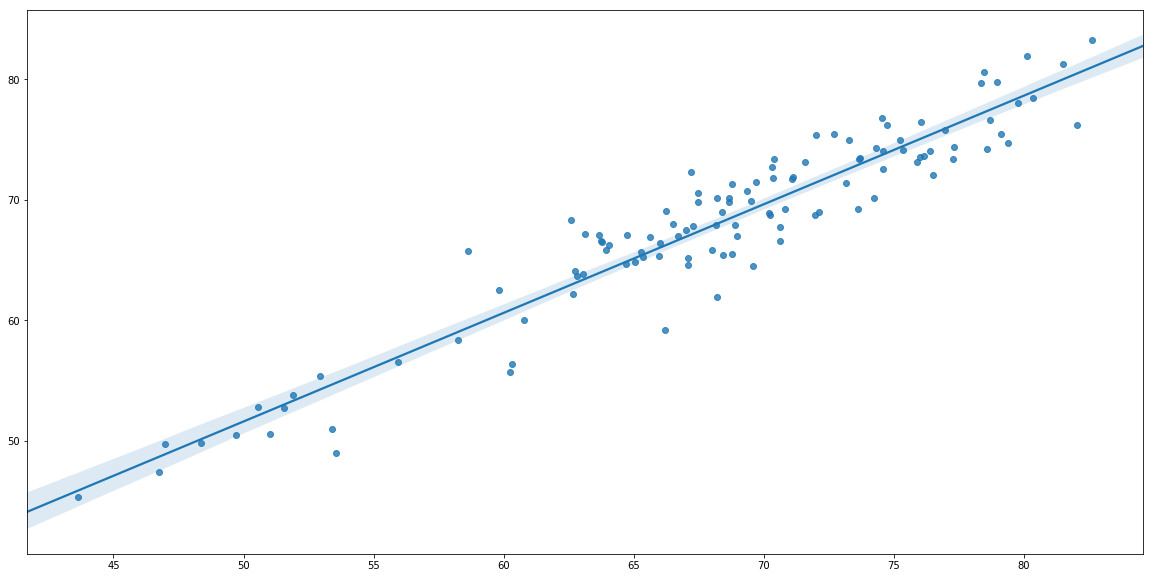

In [144]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [105]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[11]=['Novembro',len(data_mean_nov),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178
3,Março,458,1.516003,0.001496,11.387346,1.640806,0.911259,0.909959,1.516003,4.990510,0.001045,0.919675
4,Abril,461,1.602754,0.024951,9.454841,1.485142,0.882780,0.882727,1.602754,4.774466,0.000867,1.292124
5,Maio,461,1.540334,0.013486,5.540139,1.202228,0.931828,0.931601,1.540334,3.817982,0.000768,1.121283
6,Junho,467,2.050332,0.001485,7.057746,1.622295,0.923820,0.923546,2.050332,6.835702,0.001479,1.710718
7,Julho,467,1.948054,0.024750,7.699357,1.489545,0.955262,0.954036,1.948054,6.013659,0.001275,1.716392
8,Agosto,468,2.138770,0.003660,10.171247,1.829282,0.961830,0.961783,2.138770,7.920610,0.002255,1.549573
9,Setembro,470,1.990428,0.055619,8.731755,1.730603,0.962551,0.962534,1.990428,6.956790,0.002157,1.511832
10,Outubro,458,1.555567,0.003192,7.353889,1.265315,0.970369,0.970280,1.555567,4.020811,0.001140,1.191496


In [106]:
pickle.dump(mlp,open('../Models/URmin/urmin_11.model','wb'))

## Dezembro

In [107]:
data_mean_dez = pd.read_csv('../Dados/Brasil_12_mean.csv')

In [122]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_dez[features_UR_wanderlay], 
                                                    data_mean_dez[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9440231743811076
MAE: 1.7803734136308134
MSE: 5.256830023892439
MSLE: 0.0013302550460235684
MedLE: 1.4512910096365204
R2 Score: 0.9396668873011557

Error(UR_true - UR_pred)

MIN: 0.0005412642339450713 
MAX: 8.66685453290225 
MEAN: 1.7803734136308134
Std: 1.4446800794393908


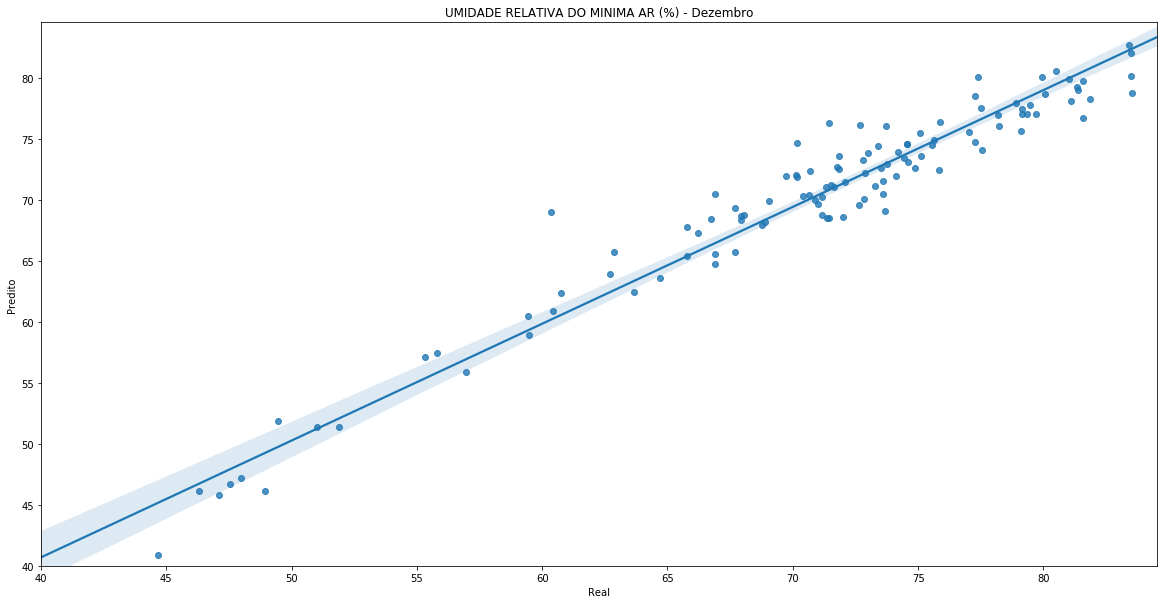

In [133]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((40,max(y_test.max(),y_pred.max())+1))
plt.ylim((40,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Dezembro')
plt.savefig('../Validacao/graph/UR_min_dez.png')

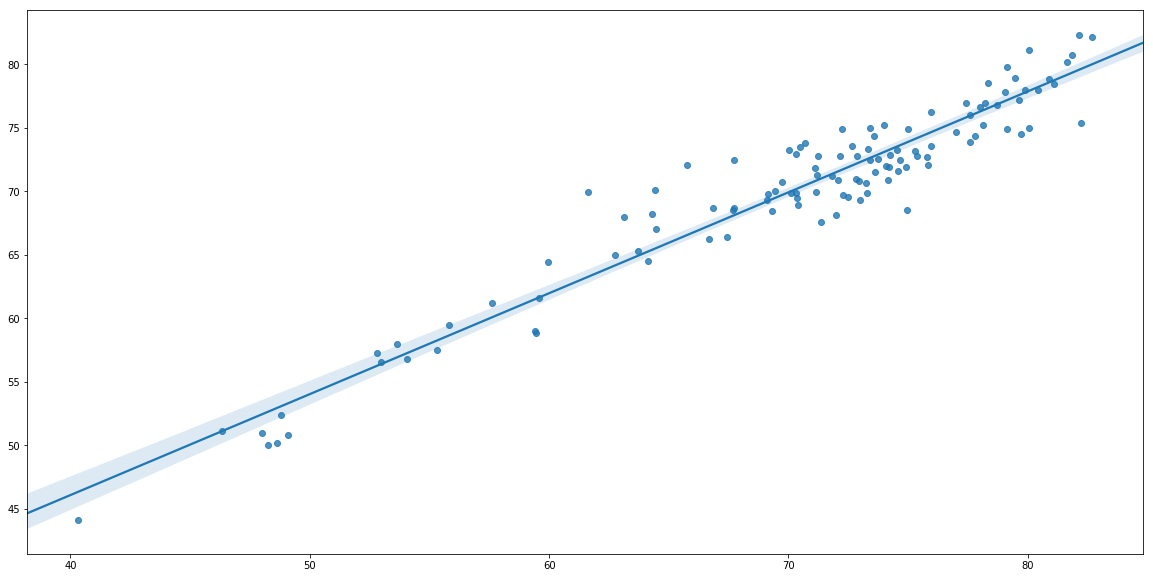

In [173]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [126]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[12]=['Dezembro',len(data_mean_dez),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178
3,Março,458,1.516003,0.001496,11.387346,1.640806,0.911259,0.909959,1.516003,4.990510,0.001045,0.919675
4,Abril,461,1.602754,0.024951,9.454841,1.485142,0.882780,0.882727,1.602754,4.774466,0.000867,1.292124
5,Maio,461,1.540334,0.013486,5.540139,1.202228,0.931828,0.931601,1.540334,3.817982,0.000768,1.121283
6,Junho,467,2.050332,0.001485,7.057746,1.622295,0.923820,0.923546,2.050332,6.835702,0.001479,1.710718
7,Julho,467,1.948054,0.024750,7.699357,1.489545,0.955262,0.954036,1.948054,6.013659,0.001275,1.716392
8,Agosto,468,2.138770,0.003660,10.171247,1.829282,0.961830,0.961783,2.138770,7.920610,0.002255,1.549573
9,Setembro,470,1.990428,0.055619,8.731755,1.730603,0.962551,0.962534,1.990428,6.956790,0.002157,1.511832
10,Outubro,458,1.555567,0.003192,7.353889,1.265315,0.970369,0.970280,1.555567,4.020811,0.001140,1.191496


In [127]:
pickle.dump(mlp,open('../Models/URmin/urmin_12.model','wb'))

### Salvando as mestricas de avaliação

In [136]:
data_ur_erros['std_target'] = [data_mean_jan[target_wanderlay].std()[0],
                                 data_mean_fev[target_wanderlay].std()[0],
 data_mean_mai[target_wanderlay].std()[0],data_mean_abr[target_wanderlay].std()[0],
 data_mean_mar[target_wanderlay].std()[0],data_mean_jun[target_wanderlay].std()[0],
 data_mean_jul[target_wanderlay].std()[0],data_mean_ago[target_wanderlay].std()[0],
 data_mean_set[target_wanderlay].std()[0],data_mean_out[target_wanderlay].std()[0],
 data_mean_nov[target_wanderlay].std()[0],data_mean_dez[target_wanderlay].std()[0]]
data_ur_erros

,Month,Qto_estacioes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE,std_target
1,Janeiro,458,1.627894,0.028462,5.691935,1.334421,0.923668,0.923644,1.627894,4.430719,0.000820,1.181883,7.117130
2,Fevereiro,458,1.688771,0.031995,7.299493,1.474877,0.910800,0.907403,1.688771,5.027210,0.000947,1.377178,7.152496
3,Março,458,1.516003,0.001496,11.387346,1.640806,0.911259,0.909959,1.516003,4.990510,0.001045,0.919675,7.688150
4,Abril,461,1.602754,0.024951,9.454841,1.485142,0.882780,0.882727,1.602754,4.774466,0.000867,1.292124,6.365415
5,Maio,461,1.540334,0.013486,5.540139,1.202228,0.931828,0.931601,1.540334,3.817982,0.000768,1.121283,6.717542
6,Junho,467,2.050332,0.001485,7.057746,1.622295,0.923820,0.923546,2.050332,6.835702,0.001479,1.710718,9.486202
7,Julho,467,1.948054,0.024750,7.699357,1.489545,0.955262,0.954036,1.948054,6.013659,0.001275,1.716392,12.026824
8,Agosto,468,2.138770,0.003660,10.171247,1.829282,0.961830,0.961783,2.138770,7.920610,0.002255,1.549573,14.040964
9,Setembro,470,1.990428,0.055619,8.731755,1.730603,0.962551,0.962534,1.990428,6.956790,0.002157,1.511832,13.366882
10,Outubro,458,1.555567,0.003192,7.353889,1.265315,0.970369,0.970280,1.555567,4.020811,0.001140,1.191496,10.811372


In [137]:
data_ur_erros.to_csv('../Validacao/URmin.csv',float_format='%.3f')